***1. Set Up the Database***

1. Create a connection to an SQLite database file named student_grades.db. If the
database file does not exist, SQLite will automatically create it.
2. Create a cursor object to interact with the database

In [16]:
import sqlite3
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

***2. Create the Necessary Tables***
You will need two tables for this assignment:
• students: A table to store student information.
• grades: A table to store student grades for different subjects.
The structure of the tables should be as follows:
students table:
• student_id (INTEGER, Primary Key, Auto-increment)
• first_name (TEXT)
• last_name (TEXT)
grades table:
• grade_id (INTEGER, Primary Key, Auto-increment)
• student_id (INTEGER, Foreign Key linked to students table)
• subject (TEXT)
• grade (INTEGER)

In [19]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students(
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades(
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
    )
''')


***3. Insert Data into the Tables***
Insert at least 5 students into the students table and at least 3 grades for each student into
the grades table.
Sample data for the students table:
student_id first_name last_name
1. Alice Johnson
2. Bob Smith
3. Carol White
4. David Brown
5. Eve Davis
Sample data for the grades table:
grade_id student_id subject grade
1. 1 Math 95
2. 1 English 88
3. 1 History 90
4. 2 Math 82
5. 2 English 76
6. 2 History 85


In [21]:
students_data = [
    (1,"Alice","Johnson"),
    (2,"Bob","Smith"),
    (3,"Carol","White"),
    (4,"David","Brown"),
    (5,"Eve","Davis")
]

cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

connection.commit()

In [23]:
grades_data = [
    (1,1,"Math",95),
    (2,1,"English",88),
    (3,1,"History",90),
    (4,2,"Math",85),
    (5,2,"English",76),
    (6,2,"History",85),
    (7,3,"Math",76),
    (8,3,"English",98),
    (9,3,"History",84),
    (10,4,"Math",90),
    (11,4,"English",96),
    (12,4,"History",88),
    (13,5,"Math",99),
    (14,5,"English",97),
    (15,5,"History",83)
]

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)

connection.commit()

***4. Perform SQL Queries***
Write SQL queries to answer the following questions:
1. Retrieve all students' names and their grades.
2. Find the average grade for each student.
3. Find the student with the highest average grade.
4. Find the average grade for the Math subject.
5. List all students who scored above 90 in any subject.

In [31]:
cursor.execute('''SELECT students.first_name, students.last_name, grades.grade FROM Students
    JOIN grades ON students.student_id = grades.student_id
            ''')
rows = cursor.fetchall()

print("All Student's names and grades:")
for row in rows:
    print(row)

All Student's names and grades:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 85)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 76)
('Carol', 'White', 98)
('Carol', 'White', 84)
('David', 'Brown', 90)
('David', 'Brown', 96)
('David', 'Brown', 88)
('Eve', 'Davis', 99)
('Eve', 'Davis', 97)
('Eve', 'Davis', 83)


In [49]:
cursor.execute('''
    SELECT 
        students.first_name,
        students.last_name,
        AVG(grades.grade)
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''')

rows = cursor.fetchall()
print("Average Grades")
for row in rows:
    print(row)

Average Grades
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 82.0)
('Carol', 'White', 86.0)
('David', 'Brown', 91.33333333333333)
('Eve', 'Davis', 93.0)


In [67]:
cursor.execute('''
    SELECT 
        students.first_name,students.last_name,
        AVG(grades.grade)
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.first_name
    ORDER BY grades.grade DESC
    LIMIT 1
''')

average_grades = cursor.fetchone()
print("Average Grades")
average_grades

Average Grades


('Eve', 'Davis', 93.0)

In [79]:
cursor.execute('''
    SELECT 
        subject,
        AVG(grades.grade)
    FROM grades
    WHERE subject ="Math"  
''')

AVG_Math = cursor.fetchone()
AVG_Math

('Math', 89.0)

In [83]:
cursor.execute('''
    SELECT 
        s.first_name,
        s.last_name,
        g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id 
    WHERE grade>90  
''')
smartkids = cursor.fetchall()
smartkids

[('Alice', 'Johnson', 95),
 ('Carol', 'White', 98),
 ('David', 'Brown', 96),
 ('Eve', 'Davis', 99),
 ('Eve', 'Davis', 97)]

***5. Load Data into Pandas***
1. Use Pandas to load the data from the students and grades tables into DataFrames.
2. Use JOIN queries to combine the data from both tables into a single DataFrame that
includes each student's name, subject, and grade.
3. Visualize the data with Matplotlib:
o Plot the average grades for each student.
o Create a bar chart showing the average grade for each subject

In [98]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  

students_df = pd.read_sql_query("SELECT * FROM students", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)
#students_df.head()

In [113]:
students_grades = pd.read_sql_query("""
    SELECT s.first_name, s.last_name, g.subject, g.grade
    FROM students s
    JOIN grades g ON s.student_id = g.student_id;
""", connection)

students_grades

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,85
4,Bob,Smith,English,76
5,Bob,Smith,History,85
6,Carol,White,Math,76
7,Carol,White,English,98
8,Carol,White,History,84
9,David,Brown,Math,90


In [117]:
avg_grades = students_grades.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
subject_avg_grades = students_grades.groupby('subject')['grade'].mean().reset_index()
avg_grades

,first_name,last_name,grade
0,Alice,Johnson,91.000000
1,Bob,Smith,82.000000
2,Carol,White,86.000000
3,David,Brown,91.333333
4,Eve,Davis,93.000000


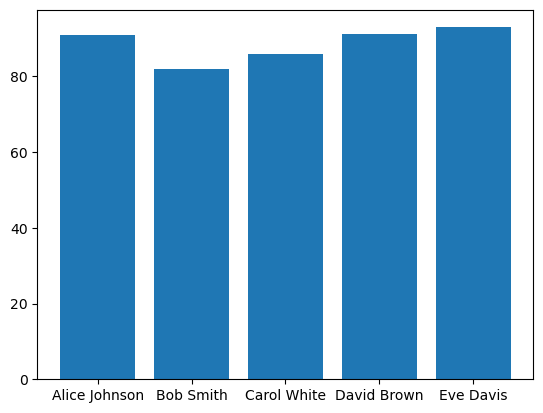

In [125]:
plt.bar(avg_grades['first_name'] + ' ' + avg_grades['last_name'], avg_grades['grade'])
plt.show()

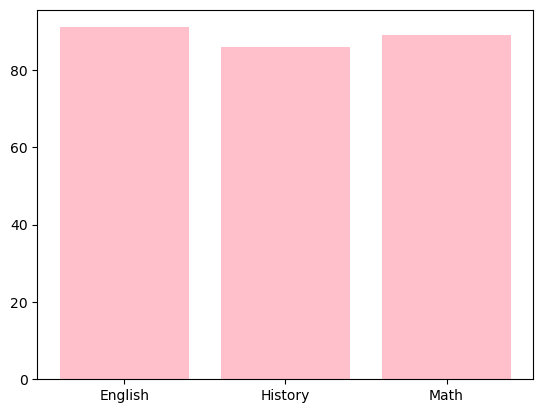

In [133]:
plt.bar(subject_avg_grades['subject'],subject_avg_grades['grade'],color="pink")
plt.show()